### Helium atom

In this blog post, we'll have a look at how to solve the Schrödinger equation of the helium atom numerically and what complications we face along the way.

In [ ]:
# 3-D Schrödinger

import numpy as np

n = 40
x = np.linspace(7, 0.0, n, endpoint=False)[::-1]
h = x[0]-x[1]

# Solves the radial wavefunction, r*R(r)
Dxx = -2 * np.eye(n,)
b = np.ones(Dxx.shape)[0]
Dxx += np.diag(b[:-1], k=1) + np.diag(b[:-1], k=-1)
Dxx /= h**2

full_3d = np.kron(Dxx, Dxx)
full_3d = np.kron(full_3d, Dxx)
print(full_3d.shape)


V = np.zeros((n,n))
# 1-D atom
V = 1.0 / x
V = np.diag(V)
w, v = np.linalg.eigh((-0.5 * Dxx - V))

import matplotlib.pyplot as plt

emin = np.argsort(w)[0]
norm = np.dot(v[:,emin].T,v[:,emin]) #*h
print(np.dot(v[:,emin], np.dot((-0.5 * Dxx - V), v[:,emin].T)))
print(w[emin], norm)

norm = integrate.simpson(v[:,emin]**2, x)
#print(integrate.simpson(v[:,emin]**2, x))

#Plot density
plt.plot(x, v[:,emin]**2 / norm)
plt.show()

In [2]:
import numpy as np
from scipy import integrate

def solvr(U, r, E=-0.5):
    return [U[1], - U[0] * (2/r + 2*E)]

a_t = np.linspace(20, 0.0, 2000, endpoint=False)
asol = integrate.odeint(solvr, [0.0, 1.5e-7], a_t)
#plt.plot(a_t, asol[:,0]/a_t)
print(np.dot(asol[:,0].T, asol[:,0]))
plt.plot(a_t, asol[:,0]**2 / np.dot(asol[:,0].T, asol[:,0]))
plt.show()

104.17918399649807


NameError: name 'plt' is not defined

-0.4999961448242146
-0.49999614482708454 0.9999999999999964


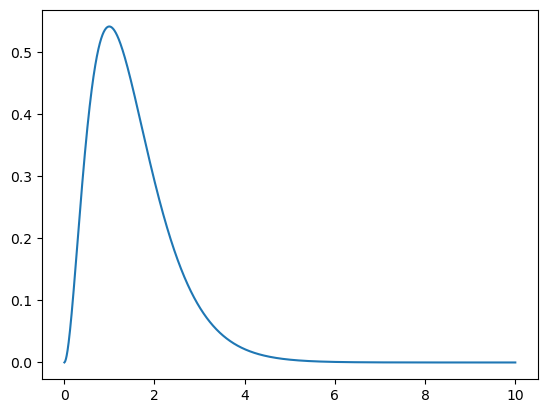

In [3]:
# 1-D Schrödinger

import numpy as np

n = 2000
x = np.linspace(10, 0.0, n, endpoint=False)[::-1]
h = x[0]-x[1]

# Solves the radial wavefunction, r*R(r)
Dxx = -2 * np.eye(n,)
b = np.ones(Dxx.shape)[0]
Dxx += np.diag(b[:-1], k=1) + np.diag(b[:-1], k=-1)
Dxx /= h**2
V = np.zeros((n,n))
# 1-D atom
V = 1.0 / x
V = np.diag(V)
w, v = np.linalg.eigh((-0.5 * Dxx - V))

import matplotlib.pyplot as plt

emin = np.argsort(w)[0]
norm = np.dot(v[:,emin].T,v[:,emin]) #*h
print(np.dot(v[:,emin], np.dot((-0.5 * Dxx - V), v[:,emin].T)))
print(w[emin], norm)

norm = integrate.simpson(v[:,emin]**2, x)
#print(integrate.simpson(v[:,emin]**2, x))

#Plot density
plt.plot(x, v[:,emin]**2 / norm)
plt.show()

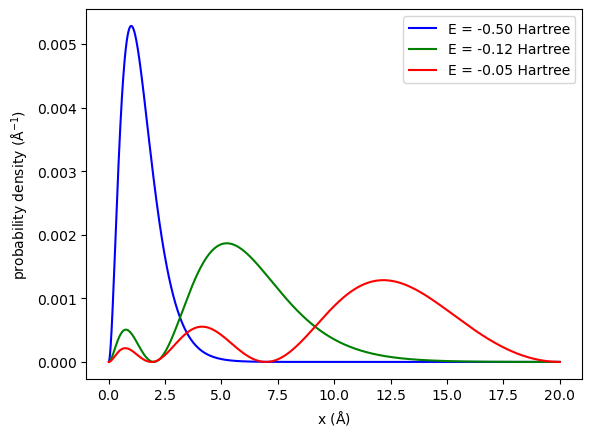

In [4]:
#From: https://physicspython.wordpress.com/2020/06/04/the-problem-of-the-hydrogen-atom-part-2/

import numpy as np
from scipy import constants as const
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt
 
hbar = const.hbar
e = const.e
m_e = const.m_e
pi = const.pi
epsilon_0 = const.epsilon_0
joul_to_eV = e

def calculate_potential_term(r):
    #potential = e**2 / (4.0 * pi * epsilon_0) / r
    potential = 1.0 / r
    potential_term = sparse.diags((potential))
    return potential_term
 
def calculate_angular_term(r):
    angular = l * (l + 1) / r**2
    angular_term = sparse.diags((angular))
    return angular_term
 
def calculate_laplace_three_point(r):
    h = r[1] - r[0]
     
    main_diag = -2.0 / h**2 * np.ones(N)     
    off_diag  =  1.0 / h**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term
     
def build_hamiltonian(r):
    laplace_term =   calculate_laplace_three_point(r)
    angular_term =   calculate_angular_term(r)
    potential_term = calculate_potential_term(r)
     
    #hamiltonian = -hbar**2 / (2.0 * m_e) * (laplace_term - angular_term) - potential_term
    hamiltonian = -0.5 * (laplace_term - angular_term) - potential_term
 
    return hamiltonian

# Everything in SI units
N = 2049
l = 0
#r = np.linspace(2e-9, 0.0, N, endpoint=False)
r = np.linspace(2e1, 0.0, N, endpoint=False)[::-1]
hamiltonian = build_hamiltonian(r)

""" solve eigenproblem """
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)
 
""" compute probability density for each eigenvector """
densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]

norm = integrate.simpson(densities[0], r)

def plot(r, densities, eigenvalues):
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
     
    #energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real / e) for i in range(3)]
    energies = ['E = {: >5.2f} Hartree'.format(eigenvalues[i].real) for i in range(3)]
    #plt.plot(r * 1e+0, np.exp(-r) * r**2, color='black',  label=energies[0])
    plt.plot(r * 1e+0, densities[0], color='blue',  label=energies[0])
    plt.plot(r * 1e+0, densities[1], color='green', label=energies[1])
    plt.plot(r * 1e+0, densities[2], color='red',   label=energies[2])
     
    plt.legend()
    plt.show()
    return
 
""" plot results """
plot(r, densities, eigenvalues)

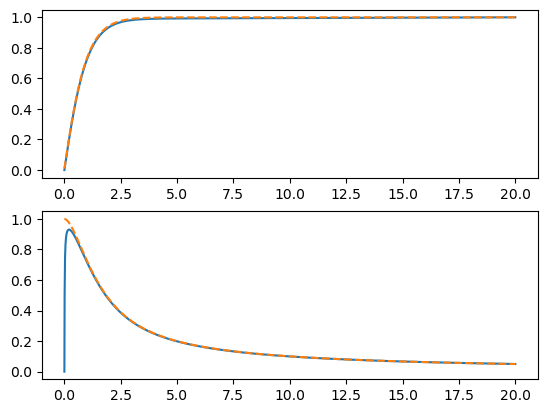

In [5]:
# Solve the Hartree potential for hydrogen atom (Thijssen, Computational physics, 5.5)

import numpy as np
from scipy.integrate import solve_bvp

def fun(x, y):
    return np.vstack((y[1], -4*x*np.exp(-2*x)))

def bc(ya, yb):
    return np.array([ya[0], 1-yb[0]]) # Boundary conditions need to be set to zero

#x = np.linspace(0.0, 20.0, 2000, endpoint=False)
x = np.linspace(2e1, 0.0, 2049, endpoint=False)[::-1]
y = np.zeros((2,x.size))
result = solve_bvp(fun, bc, x, y)

import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(x, result.y[0])
plt.plot(x, -(x+1)*np.exp(-2*x)+1, linestyle='dashed')
plt.subplot(212)
plt.plot(x, result.y[0] / x)
plt.plot(x, (-(x+1)*np.exp(-2*x)+1)/x, linestyle='dashed')
plt.show()

In [298]:
# Evaluate Hartree energy from the Hartree potential

import scipy.integrate as integrate

V_H = result.y[0] / x
E_H = integrate.romb(V_H * 4*np.pi* densities[0], dx=x[1]-x[0])
E_H_simp = integrate.simpson(V_H * 4*np.pi* densities[0], x)
E_H_anal = integrate.quad(lambda x: (-(x+1)*np.exp(-2*x)+1) * )

print(E_H, E_H_simp)

0.07552321859114039 0.07552321888319799


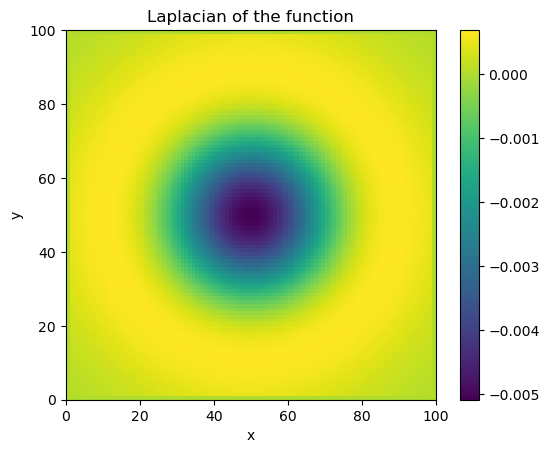

In [6]:
import numpy as np

def laplacian_2d(grid):
    """
    Calculate the Laplacian of a given 2D grid using a 5-point stencil method.
    
    Parameters:
    - grid: 2D array of float values representing the function values over a spatial domain.
    
    Returns:
    - laplacian: 2D array representing the Laplacian of the input grid.
    """
    laplacian = np.zeros_like(grid)
    laplacian[1:-1, 1:-1] = (grid[1:-1, 2:] + grid[1:-1, :-2] + grid[2:, 1:-1] + grid[:-2, 1:-1] - 4 * grid[1:-1, 1:-1])
    
    return laplacian / (dx**2)  # Assuming dx=dy, the grid spacing in both dimensions

# Example usage
Nx, Ny = 100, 100  # Grid size
dx = 1.0  # Grid spacing
X, Y = np.meshgrid(np.linspace(0, Nx*dx, Nx), np.linspace(0, Ny*dx, Ny))

# Example function on the grid, e.g., a Gaussian
f = np.exp(-((X-Nx*dx/2)**2 + (Y-Ny*dx/2)**2)/(2*(dx*Nx/5)**2))

# Compute the Laplacian
laplacian_f = laplacian_2d(f)

# Assuming you have matplotlib installed, you can visualize the Laplacian
import matplotlib.pyplot as plt

plt.imshow(laplacian_f, extent=[0, Nx*dx, 0, Ny*dx], origin='lower')
plt.colorbar()
plt.title('Laplacian of the function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
import numpy as np
from scipy.sparse import diags

# Define the number of grid points
N = 20

# Define the grid spacing
dx = 1.0

# Coefficients for the 1D Laplacian using the central difference method
diagonal = np.ones(N) * (-2.0 / dx**2)
off_diagonal = np.ones(N-1) * (1.0 / dx**2)

# Construct the sparse Laplacian matrix
Laplacian_1D = diags([off_diagonal, diagonal, off_diagonal], offsets=[-1, 0, 1], format="csr")

# Display the matrix (for small N for visualization)
print(Laplacian_1D.toarray(), Laplacian_1D.shape)


[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.

In [21]:
from scipy.sparse import kron, eye

# Number of grid points in each dimension
Nx = Ny = N

# Identity matrix needed for Kronecker product
I_Nx = eye(Nx)
I_Ny = eye(Ny)

# Construct the 2D Laplacian using Kronecker products
Laplacian_2D = kron(I_Nx, Laplacian_1D) + kron(Laplacian_1D, I_Ny)

# Display a part of the matrix
print(Laplacian_2D.toarray(), Laplacian_2D.shape)

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]] (400, 400)


In [199]:
import numpy as np
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs

# Define the number of grid points
N = 200
# Grid parameters
Nx, Ny, Nz = N, N, N  # Assuming a cubic grid
L = 20.0  # Length of the cube in atomic units (Bohr radius = 1)
dx = L / Nx

# Generate grid points
x = np.linspace(-L/2, L/2, Nx)
y = np.linspace(-L/2, L/2, Ny)
z = np.linspace(-L/2, L/2, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Calculate the distance r from the origin to each point in the grid
r = np.sqrt(X**2 + Y**2 + Z**2)
r[r==0] = 1e-10  # To avoid division by zero at the origin

# Coulomb potential for the hydrogen atom
V = -1/r

# Reshape V if necessary to match the Laplacian matrix dimensions, or use as is for element-wise operations
V_matrix = V.reshape(Nx*Ny*Nz, 1)
# Convert V_matrix to a diagonal matrix
V_diagonal = diags(V_matrix.flatten(), 0)
print(V_diagonal.shape)

(8000000, 8000000)


In [200]:
import numpy as np
from scipy.sparse import diags, kron, eye

# Number of grid points in each dimension
Nx = Ny = Nz = N  # Assuming a cubic grid for simplicity

# Define the grid spacing (assuming equal spacing in all dimensions)
dx = dy = dz = L / Nx

# 1D Laplacian in each dimension using the central difference method
diagonal = np.ones(N) * (-2.0 / dx**2)
off_diagonal = np.ones(N-1) * (1.0 / dx**2)
Laplacian_1D_x = diags([off_diagonal, diagonal, off_diagonal], offsets=[-1, 0, 1], format="csr")
Laplacian_1D_y = Laplacian_1D_x  # Same for y and z in a cubic grid
Laplacian_1D_z = Laplacian_1D_x

# Identity matrices in each dimension
I_Nx = eye(Nx)
I_Ny = eye(Ny)
I_Nz = eye(Nz)

# Construct the 3D Laplacian
Laplacian_3D = kron(kron(I_Nz, I_Ny), Laplacian_1D_x) + kron(kron(I_Nz, Laplacian_1D_y), I_Nx) + kron(kron(Laplacian_1D_z, I_Ny), I_Nx)

# Since the matrix is large, we don't print it. For demonstration, you might print a small corner or its shape
print("Shape of 3D Laplacian matrix:", Laplacian_3D.shape)

Shape of 3D Laplacian matrix: (8000000, 8000000)


In [ ]:
from scipy.sparse import diags
from scipy.sparse.linalg import eigs

# Assuming Laplacian_3D is already constructed and V_matrix is flattened appropriately

# Construct the Hamiltonian
H = -0.5 * Laplacian_3D + V_diagonal  # Note: The Laplacian is multiplied by -1/2, the coefficient in the kinetic energy term

# Solve for the 10 lowest eigenvalues and corresponding eigenvectors
num_eigenvalues = 20
eigenvalues, eigenvectors = eigs(H, k=num_eigenvalues, which='SR')

# Sort the eigenvalues and eigenvectors
idx = np.argsort(eigenvalues.real)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Eigenvalues are the energy levels
print("Energy levels (in atomic units):", eigenvalues.real)

In [ ]:
# Reshape an eigenvector for visualization
n = 0  # For example, the ground state
wavefunction_n = eigenvectors[:, n].reshape((Nx, Ny, Nz))

# Visualization (using matplotlib or similar library)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

density = np.abs(wavefunction_n[:, :, Nz//2])**2
#print(X.shape, Y.shape, density.shape)

# Simple visualization of the wavefunction's probability density
#plt.figure()
#plt.imshow(np.abs(wavefunction_n[:, :, Nz//2])**2)  # A slice through the center
#plt.colorbar()
#plt.contour([X, Y,], density,)
#plt.title('Probability Density of the Ground State')
#plt.show()

z_index = wavefunction_n.shape[2] // 2
# Calculate the ground state density |psi|^2 on the xy-plane at z=0
deltaV = dx * dy * dz
density = np.abs(wavefunction_n[:, :, z_index])**2 / deltaV

# Plotting
plt.figure(figsize=(6, 5))
plt.contourf(X[:, :, z_index], Y[:, :, z_index], density, levels=50, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('x (a.u.)')
plt.ylabel('y (a.u.)')
plt.title('Ground State Density of Hydrogen Atom')
plt.axis('equal')  # To maintain aspect ratio
plt.show()

In [198]:
import numpy as np

# Assuming psi is your ground state wavefunction array on a 3D grid
# And assuming dx, dy, dz are your grid spacings in x, y, z directions, respectively

# Calculate the volume element
deltaV = dx * dy * dz

# Calculate the normalization integral (sum)
norm_integral = np.sum(np.abs(wavefunction_n)**2)

# Check if the wavefunction is normalized
print("Normalization integral:", norm_integral)

# If norm_integral is not close to 1, you may need to normalize psi manually
if not np.isclose(norm_integral, 1.0, atol=1e-3):
    psi_normalized = wavefunction_n / np.sqrt(norm_integral)
    # Now psi_normalized should be properly normalized
    # You can recheck using the same method if needed
else:
    print("The ground state wavefunction is properly normalized.")


Normalization integral: 0.9999999999999823
The ground state wavefunction is properly normalized.


In [186]:
import numpy as np
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

# Define grid parameters
N = 120  # Number of points per dimension
L = 16.0  # Box size in atomic units
dx = L / N  # Grid spacing

# Generate grid points
x = np.linspace(-L/2, L/2, N, endpoint=False)
y = x  # Symmetric grid
z = x
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Calculate the distance from the origin (nucleus position) for each grid point
r = np.sqrt(X**2 + Y**2 + Z**2)
r[r==0] = 1e-6  # Avoid division by zero at the origin

# Potential energy matrix (Coulomb potential for hydrogen atom)
V = -1 / r
V_flat = V.reshape(N**3)

# Kinetic energy (Laplacian) using finite differences
e = np.ones(N)
lap1d = diags([e, -2*e, e], [-1, 0, 1], shape=(N, N)) / dx**2
I = eye(N)
Laplacian = kron(kron(I, I), lap1d) + kron(kron(I, lap1d), I) + kron(kron(lap1d, I), I)
print(Laplacian.shape)

# Hamiltonian matrix as a sparse matrix
H = -0.5 * Laplacian + diags(V_flat)

# Solve for eigenvalues and eigenvectors
num_eigenvalues = 10  # Number of eigenvalues to solve for
eigenvalues, eigenvectors = eigs(H, k=num_eigenvalues, which='SR')  # Smallest real part

# Sort the eigenvalues and corresponding eigenvectors
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

(1728000, 1728000)


KeyboardInterrupt: 

[-1.00000000e+12+0.j -4.39480704e-01+0.j -1.15266613e-01+0.j
 -1.15252798e-01+0.j -1.15252798e-01+0.j]


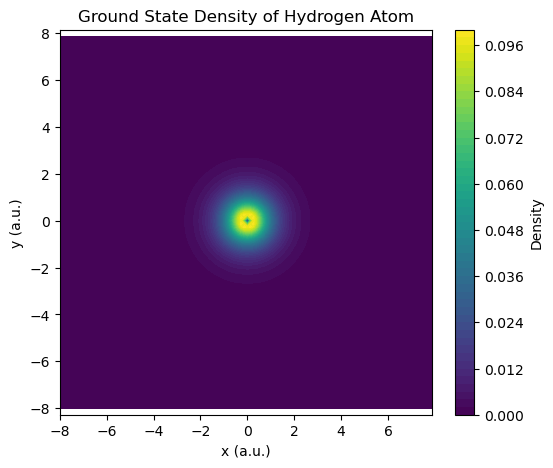

In [185]:
# Ground state wavefunction
psi_ground = eigenvectors[:, 1].reshape((N, N, N))
print(eigenvalues)

# Plot ground state density |psi|^2 on a 2D slice through the center
density = np.abs(psi_ground[:, :, N//2])**2 / dx**3

plt.figure(figsize=(6, 5))
plt.contourf(X[:, :, N//2], Y[:, :, N//2], density, levels=50, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('x (a.u.)')
plt.ylabel('y (a.u.)')
plt.title('Ground State Density of Hydrogen Atom')
plt.axis('equal')
plt.show()